In [1]:
# Impor library pandas dan matplot
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Set variabel untuk dataset uji
# Separator titik koma dan decimal berupa koma karena data berasal dari excel
data_uji = pd.read_csv('./dataset-uji.csv', sep=';', decimal='.')

In [3]:
# Cek fitur parameter data latih
data_uji.head()

,NamaBalita,JenisKelaminL/P,Umur(bln),BB(Kg),Tb(cm),StatusGiziPB/UTB/U,StatusGiziBB/U,StatusGiziBB/TB
0,RaikalShingKhurana,L,35,8.5,86,PENDEK,BBSangatkurang,giziburuk
1,MestikaNabila,P,38,10.5,85,PENDEK,BBkurang,normal
2,kamaluddinilyas,L,23,7.7,79,PENDEK,BBSangatkurang,giziburuk
3,AyumiFaujiah,P,13,6.5,68,PENDEK,BBSangatkurang,gizikurang
4,Ikhsanpratama,L,48,12,95,PENDEK,BBkurang,normal


In [4]:
# Cek statistik data latih
data_uji.describe()

,NamaBalita,JenisKelaminL/P,Umur(bln),BB(Kg),Tb(cm),StatusGiziPB/UTB/U,StatusGiziBB/U,StatusGiziBB/TB
count,190,190,189,189,189,188,188,188
unique,189,6,73,90,67,25,39,42
top,Mhd Al Rasyid,P,48,11,86,Pendek,Kurang,Baik
freq,2,91,8,18,10,77,44,36


In [5]:
# Cek total data pada dataset latih
data_uji.count()

NamaBalita            190
JenisKelaminL/P       190
Umur(bln)             189
BB(Kg)                189
Tb(cm)                189
StatusGiziPB/UTB/U    188
StatusGiziBB/U        188
StatusGiziBB/TB       188
dtype: int64

In [6]:
# Hapus kolom data kosong
data_uji = data_uji.dropna()

In [7]:
# Menyesuaikan label jenis kelamin
data_uji.loc[:,'JenisKelaminL/P'] = data_uji['JenisKelaminL/P'].replace(['lk', 'l'], 'L')
data_uji.loc[:,'JenisKelaminL/P'] = data_uji['JenisKelaminL/P'].replace(['pr', 'p'], 'P')

In [8]:
# Cek Tipe Data
print(data_uji['Umur(bln)'].dtype) # object
print(data_uji['BB(Kg)'].dtype) # object
print(data_uji['Tb(cm)'].dtype) # object

object
object
object


In [9]:
# Menyesuaikan data Umur
# Menghapus teks didalam data serta menghapus spasi pada awal dan akhir angka
fixed_umur = data_uji.loc[data_uji['Umur(bln)'].str.contains('Bln|Bin|BLn'), 'Umur(bln)'].str[0:-3].str.replace(' ','')

# Mengganti data umur awal dengan yang baru
data_uji.loc[data_uji['Umur(bln)'].str.contains('Bln|Bin|BLn'), 'Umur(bln)'] = fixed_umur

In [10]:
# Menyesuaikan data Berat Badan
# Menghapus teks didalam data serta menghapus spasi pada awal dan akhir angka
fixed_bb = data_uji.loc[data_uji['BB(Kg)'].str.contains('kg|Kg|KG'), 'BB(Kg)'].str[0:-2].str.replace(' ','')

# Mengganti data berat awal dengan yang baru
data_uji.loc[data_uji['BB(Kg)'].str.contains('kg|Kg|KG'), 'BB(Kg)'] = fixed_bb

In [11]:
# Menyesuaikan data Tinggi Badan
# Menghapus teks didalam data serta menghapus spasi pada awal dan akhir angka
fixed_tb = data_uji.loc[data_uji['Tb(cm)'].str.contains('cm|Cm|CM'), 'Tb(cm)'].str[0:-2].str.replace(' ','')

# Mengganti data tinggi awal dengan yang baru
data_uji.loc[data_uji['Tb(cm)'].str.contains('cm|Cm|CM'), 'Tb(cm)'] = fixed_tb

In [12]:
# Cek Tipe Data
print(data_uji['Umur(bln)'].dtype) # object
print(data_uji['BB(Kg)'].dtype) # object
print(data_uji['Tb(cm)'].dtype) # Object

object
object
object


In [13]:
# Mengubah tanda koma menjadi titik
data_uji['BB(Kg)'] = data_uji['BB(Kg)'].str.replace(',', '.')
data_uji['Tb(cm)'] = data_uji['Tb(cm)'].str.replace(',', '.')

In [14]:
# Mengubah Umur, Berat, dan Tinggi menjadi numeral
data_uji['Umur(bln)'] = pd.to_numeric(data_uji['Umur(bln)']) # int64
data_uji['BB(Kg)'] = pd.to_numeric(data_uji['BB(Kg)']) # float64
data_uji['Tb(cm)'] = pd.to_numeric(data_uji['Tb(cm)']) # float64

In [15]:
# Pencarian outlier pada Fitur Umur
# Mencari Q1 dan Q3
Q1_umur = data_uji['Umur(bln)'].quantile(0.25)
Q3_umur = data_uji['Umur(bln)'].quantile(0.75)

# Mencari IQR serta batas bawah dan batas atas
IQR_umur = Q3_umur - Q1_umur
umur_bawah = Q1_umur - 1.5 * IQR_umur
umur_atas = Q3_umur + 1.5 * IQR_umur

# Mencari data outlier dari dataset latih
outlier_umur = data_uji.loc[(data_uji['Umur(bln)'] < umur_bawah) | (data_uji['Umur(bln)'] > umur_atas)]

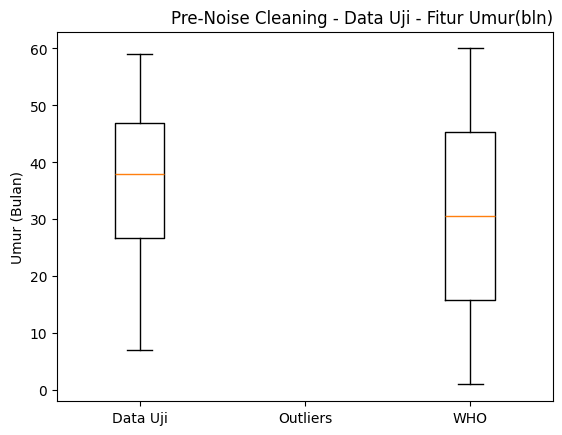

In [16]:
# Visualisasi data berbentuk boxplot untuk data Umur
# Batasan WHO umur 1 - 60
who_age = list(range(1,61))
data = [data_uji['Umur(bln)'], outlier_umur['Umur(bln)'], who_age]
labels = ['Data Uji', 'Outliers', 'WHO']

plt.title('Pre-Noise Cleaning - Data Uji - Fitur Umur(bln)', loc='right')
plt.ylabel('Umur (Bulan)')
plt.boxplot(data, tick_labels=labels)
plt.show()

In [17]:
# Mencari noise pada outlier umur
# Data usia wajar menurut WHO yakni 1 sampai dengan 60 bulan
noise_umur = outlier_umur.loc[(outlier_umur['Umur(bln)'] < 1) | (outlier_umur['Umur(bln)'] > 60)]

# Hapus data tidak wajar pada data latih
data_uji = data_uji.drop(index = noise_umur.index).reset_index(drop=True)

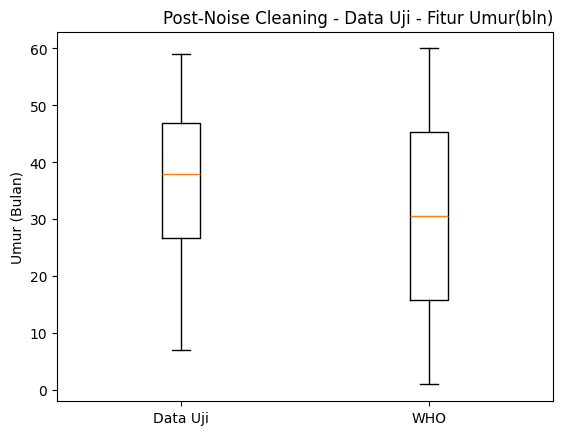

In [18]:
# Visualisasi data berbentuk boxplot untuk data Umur
# Batasan WHO umur 1 - 60
who_age = list(range(1,61))
data = [data_uji['Umur(bln)'],  who_age]
labels = ['Data Uji', 'WHO']

plt.title('Post-Noise Cleaning - Data Uji - Fitur Umur(bln)', loc='right')
plt.ylabel('Umur (Bulan)')
plt.boxplot(data, tick_labels=labels)
plt.show()

In [19]:
# Pencarian outlier pada Fitur Berat
# Mencari Q1 dan Q3
Q1_berat = data_uji['BB(Kg)'].quantile(0.25)
Q3_berat = data_uji['BB(Kg)'].quantile(0.75)

# Mencari IQR serta batas bawah dan batas atas
IQR_berat = Q3_berat - Q1_berat
berat_bawah = Q1_berat - 1.5 * IQR_berat
berat_atas = Q3_berat + 1.5 * IQR_berat

# Mencari data outlier dari dataset latih
outlier_berat = data_uji.loc[(data_uji['BB(Kg)'] < berat_bawah) | (data_uji['BB(Kg)'] > berat_atas)]

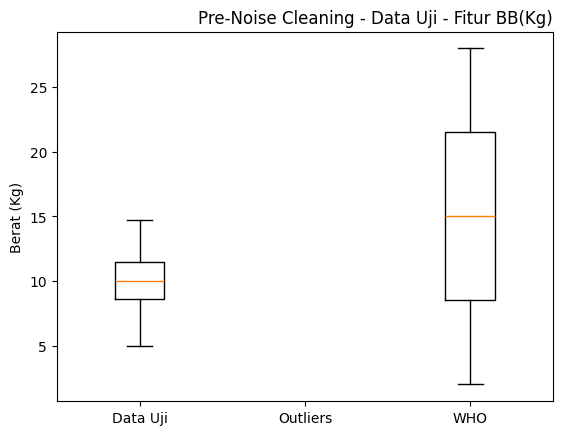

In [20]:
# Visualisasi data berbentuk boxplot untuk data Umur
# Batasan WHO berat 2 - 28
who_berat = list(range(2,29))
data = [data_uji['BB(Kg)'], outlier_berat['BB(Kg)'], who_berat]
labels = ['Data Uji', 'Outliers', 'WHO']

plt.title('Pre-Noise Cleaning - Data Uji - Fitur BB(Kg)', loc='right')
plt.ylabel('Berat (Kg)')
plt.boxplot(data, tick_labels=labels)
plt.show()

In [21]:
# Mencari noise pada outlier Berat
# Data berat wajar menurut WHO yakni 2 sampai dengan 28
noise_berat = outlier_berat.loc[(outlier_berat['BB(Kg)'] < 2) | (outlier_berat['BB(Kg)'] > 28)]

# Hapus data tidak wajar pada data latih
data_uji = data_uji.drop(index = noise_berat.index).reset_index(drop=True)

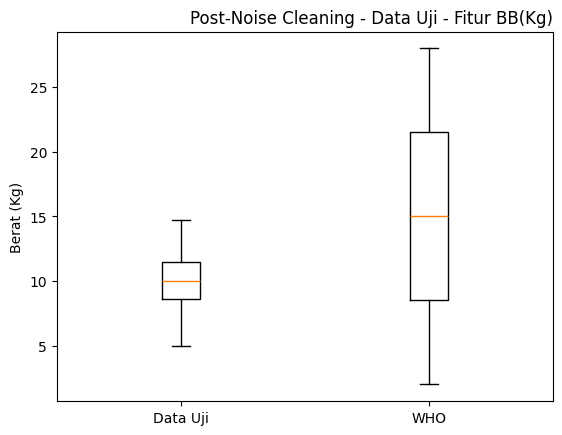

In [22]:
# Visualisasi data berbentuk boxplot untuk data Umur
# Batasan WHO berat 2 - 28
who_berat = list(range(2,29))
data = [data_uji['BB(Kg)'], who_berat]
labels = ['Data Uji', 'WHO']

plt.title('Post-Noise Cleaning - Data Uji - Fitur BB(Kg)', loc='right')
plt.ylabel('Berat (Kg)')
plt.boxplot(data, tick_labels=labels)
plt.show()

In [23]:
# Pencarian outlier pada Fitur Tinggi
# Mencari Q1 dan Q3
Q1_tinggi = data_uji['Tb(cm)'].quantile(0.25)
Q3_tinggi = data_uji['Tb(cm)'].quantile(0.75)

# Mencari IQR serta batas bawah dan batas atas
IQR_tinggi = Q3_tinggi - Q1_tinggi
tinggi_bawah = Q1_tinggi - 1.5 * IQR_tinggi
tinggi_atas = Q3_tinggi + 1.5 * IQR_tinggi

# Mencari data outlier dari dataset latih
outlier_tinggi = data_uji.loc[(data_uji['Tb(cm)'] < tinggi_bawah) | (data_uji['Tb(cm)'] > tinggi_atas)]

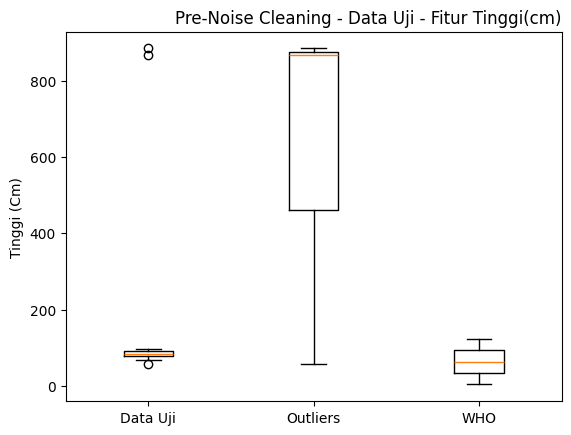

In [24]:
# Visualisasi data berbentuk boxplot untuk data Umur
# Batasan WHO tinggi 4 - 124
who_tinggi = list(range(4,125))
data = [data_uji['Tb(cm)'], outlier_tinggi['Tb(cm)'],  who_tinggi]
labels = ['Data Uji', 'Outliers', 'WHO']

plt.title('Pre-Noise Cleaning - Data Uji - Fitur Tinggi(cm)', loc='right')
plt.ylabel('Tinggi (Cm)')
plt.boxplot(data, tick_labels=labels)
plt.show()

In [25]:
# Mencari noise pada outlier Tinggi
# Data tingg wajar menurut WHO yakni 44 sampai dengan 124
noise_tinggi = outlier_tinggi.loc[(outlier_tinggi['Tb(cm)'] < 4) | (outlier_tinggi['Tb(cm)'] > 124)]

# Hapus data tidak wajar pada data latih
data_uji = data_uji.drop(index = noise_tinggi.index).reset_index(drop=True)

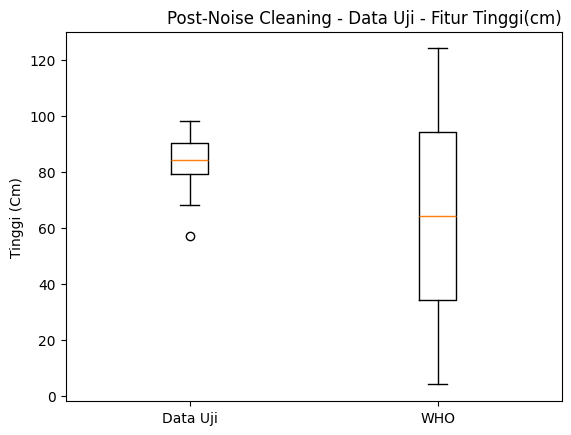

In [26]:
# Visualisasi data berbentuk boxplot untuk data Umur
# Batasan WHO tinggi 4 - 124
who_tinggi = list(range(4,125))
data = [data_uji['Tb(cm)'],  who_tinggi]
labels = ['Data Uji', 'WHO']

plt.title('Post-Noise Cleaning - Data Uji - Fitur Tinggi(cm)', loc='right')
plt.ylabel('Tinggi (Cm)')
plt.boxplot(data, tick_labels=labels)
plt.show()

In [27]:
# Menghapus data duplikat
data_uji.drop_duplicates(inplace=True)

In [29]:
# Pengecekan ulang data
data_uji.describe()

,Umur(bln),BB(Kg),Tb(cm)
count,185.000000,185.000000,185.000000
mean,36.897297,10.066486,84.003784
std,12.498489,1.919008,7.955886
min,7.000000,5.000000,57.000000
25%,27.000000,8.600000,79.000000
50%,38.000000,10.000000,84.500000
75%,47.000000,11.500000,90.500000
max,59.000000,14.700000,98.000000


In [31]:
# Penggantian nama fitur Gender, Age, Body Weight, dan Body Length
data_uji.rename(columns={"JenisKelaminL/P":"jenisKelamin", "Umur(bln)":"umur", "BB(Kg)":"beratBadan", "Tb(cm)":"tinggiBadan"}, inplace=True)

In [33]:
# Pengecekan ulang fitur data
data_uji.head()

,NamaBalita,jenisKelamin,umur,beratBadan,tinggiBadan,StatusGiziPB/UTB/U,StatusGiziBB/U,StatusGiziBB/TB
0,RaikalShingKhurana,L,35,8.5,86.0,PENDEK,BBSangatkurang,giziburuk
1,MestikaNabila,P,38,10.5,85.0,PENDEK,BBkurang,normal
2,kamaluddinilyas,L,23,7.7,79.0,PENDEK,BBSangatkurang,giziburuk
3,AyumiFaujiah,P,13,6.5,68.0,PENDEK,BBSangatkurang,gizikurang
4,Ikhsanpratama,L,48,12.0,95.0,PENDEK,BBkurang,normal


In [34]:
# Eksport dataset uji mentah menjadi data_uji_clean.csv
data_uji.to_csv('./data_uji_clean.csv', index=False)